In [1]:
import os
import json

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import time

# Load the CSV files using pandas
 
dec_path = "2019-Dec-Cleaned.csv"  

# Start timer
start_time = time.time()

#read in csv file
dec_df = pd.read_csv(dec_path)

# Print time taken to load data
print(f"Data loaded in {time.time() - start_time} seconds")

Data loaded in 11.081733226776123 seconds


In [15]:
# Load the CSV files using pandas
nov_path = "2019-Nov-Cleaned.csv"  

# Start timer
start_time = time.time()

nov_df = pd.read_csv(nov_path)

# Print time taken to load data
print(f"Data loaded in {time.time() - start_time} seconds")

Data loaded in 241.29883193969727 seconds


In [16]:
print(nov_df.head())
print(dec_df.head())

                event_time event_type  product_id          category_id  \
0  2019-11-01 00:00:00 UTC       view     1003461  2053013555631882655   
1  2019-11-01 00:00:00 UTC       view     5000088  2053013566100866035   
2  2019-11-01 00:00:01 UTC       view     3601530  2053013563810775923   
3  2019-11-01 00:00:01 UTC       view     1004775  2053013555631882655   
4  2019-11-01 00:00:01 UTC       view     1306894  2053013558920217191   

               category_code   brand   price    user_id  \
0     electronics.smartphone  xiaomi  489.07  520088904   
1  appliances.sewing_machine  janome  293.65  530496790   
2  appliances.kitchen.washer      lg  712.87  518085591   
3     electronics.smartphone  xiaomi  183.27  558856683   
4         computers.notebook      hp  360.09  520772685   

                           user_session  
0  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33  
1  8e5f4f83-366c-4f70-860e-ca7417414283  
2  3bfb58cd-7892-48cc-8020-2f17e6de6e7f  
3  313628f1-68b8-460d-84f6-cec7a

In [17]:
# Get column names 
nov_columns = nov_df.columns.tolist()
print(f"November dataset columns: {nov_columns}")
dec_columns = dec_df.columns.tolist()
print(f"December dataset columns: {dec_columns}")

November dataset columns: ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']
December dataset columns: ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id', 'user_session']


In [30]:
#Visualization
import matplotlib.pyplot as plt
# combne our data frames 
combined_df = pd.concat([nov_df, dec_df], ignore_index=True)

# print first 5 rows 
print(combined_df.head())

                event_time event_type  product_id          category_id  \
0  2019-11-01 00:00:00 UTC       view     1003461  2053013555631882655   
1  2019-11-01 00:00:00 UTC       view     5000088  2053013566100866035   
2  2019-11-01 00:00:01 UTC       view     3601530  2053013563810775923   
3  2019-11-01 00:00:01 UTC       view     1004775  2053013555631882655   
4  2019-11-01 00:00:01 UTC       view     1306894  2053013558920217191   

               category_code   brand   price    user_id  \
0     electronics.smartphone  xiaomi  489.07  520088904   
1  appliances.sewing_machine  janome  293.65  530496790   
2  appliances.kitchen.washer      lg  712.87  518085591   
3     electronics.smartphone  xiaomi  183.27  558856683   
4         computers.notebook      hp  360.09  520772685   

                           user_session  
0  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33  
1  8e5f4f83-366c-4f70-860e-ca7417414283  
2  3bfb58cd-7892-48cc-8020-2f17e6de6e7f  
3  313628f1-68b8-460d-84f6-cec7a

In [54]:
#calculate total spending 
user_spending = df.groupby('user_id')['price'].sum().reset_index()

#spending categories 
spending_bins = [0, 200, 500, 1000, float('inf')]  # Define spending ranges
spending_labels = ['Low (0-200)', 'Medium (200-500)', 'High (500-1000)', 'Very High (1000+)']
user_spending['spending_category'] = pd.cut(user_spending['price'], bins=spending_bins, labels=spending_labels)

# merge spending 
df = df.merge(user_spending[['user_id', 'spending_category']], on='user_id', how='left')


In [56]:
# count customers in each category 
category_counts = user_spending['spending_category'].value_counts().sort_index()

# create customer count
customer_count = df['spending_category'].value_counts().sort_index()

df['customer_count'] = df['spending_category'].map(customer_count)

In [58]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,spending_category_x,spending_category_y,spending_category,customer_count
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,Very High (1000+),Very High (1000+),Very High (1000+),41391157
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,Very High (1000+),Very High (1000+),Very High (1000+),41391157
2,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,Very High (1000+),Very High (1000+),Very High (1000+),41391157
3,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,High (500-1000),High (500-1000),High (500-1000),1709770
4,2019-11-01 00:00:01 UTC,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c,Very High (1000+),Very High (1000+),Very High (1000+),41391157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44867664,2019-12-02 23:59:57 UTC,view,1002545,2232732093077520756,construction.tools.light,apple,591.75,512659486,903a5112-46f2-4cc8-b8e1-41835ca6000d,Very High (1000+),Very High (1000+),Very High (1000+),41391157
44867665,2019-12-02 23:59:57 UTC,view,1004870,2232732093077520756,construction.tools.light,samsung,275.54,518171531,7bf5aacd-54a7-42c4-8d88-82a160cf12d7,Very High (1000+),Very High (1000+),Very High (1000+),41391157
44867666,2019-12-02 23:59:57 UTC,view,39100015,2053013562116277013,construction.tools.light,luxvisage,5.92,581137827,285fc46c-9ca9-4060-8486-5a19bb258705,Low (0-200),Low (0-200),Low (0-200),647379
44867667,2019-12-02 23:59:57 UTC,view,1004233,2232732093077520756,construction.tools.light,apple,1161.68,581140975,7e0377ee-1c8a-4010-95d8-61292a55b714,Very High (1000+),Very High (1000+),Very High (1000+),41391157


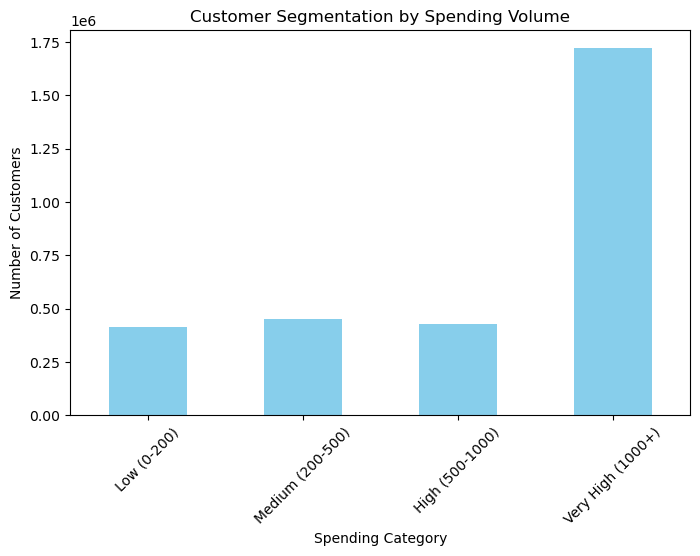

In [64]:
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation by Spending Volume')
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

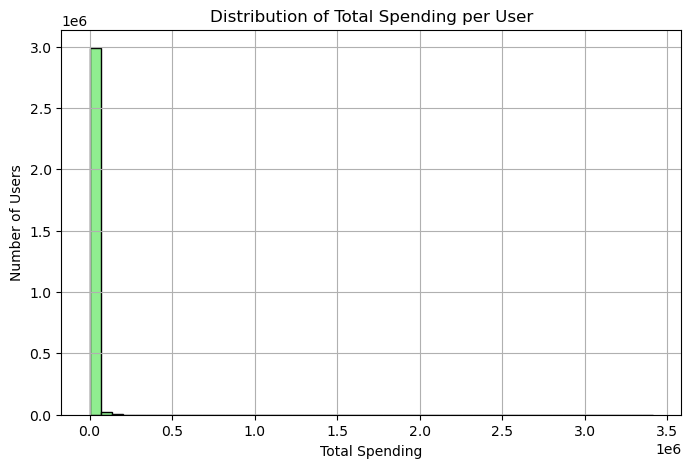

In [72]:
plt.figure(figsize=(8, 5))
plt.hist(user_spending['price'], bins=50, color='lightgreen', edgecolor='black')  # More bins
plt.title('Distribution of Total Spending per User')
plt.xlabel('Total Spending')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()
